<a href="https://colab.research.google.com/github/RahulBhardwaj-20BCS9410/Face-Mask-Detection-Project/blob/main/ML_Models_For_predicting_Air_Pollution_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings; warnings.simplefilter('ignore')

In [6]:
dataset=pd.read_csv('..//content/data.csv.zip',encoding="ISO-8859-1")
dataset.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [9]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [10]:
#Finding missing values in the data set
total = dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(dataset)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
pm2_5,426428,97.86
spm,237387,54.48
rspm,40222,9.23
so2,34646,7.95
no2,16233,3.73
type,5393,1.24
date,7,0.00
location,3,0.00


In [11]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #return df_out

remove_outlier(dataset,'so2')
remove_outlier(dataset,'no2')
remove_outlier(dataset,'rspm')
remove_outlier(dataset,'spm')

In [ ]:
dataset.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


In [12]:
by_State=dataset.groupby('state')

def impute_mean(series):
    return series.fillna(series.mean())

dataset['rspm']=by_State['rspm'].transform(impute_mean)
dataset['so2']=by_State['so2'].transform(impute_mean)
dataset['no2']=by_State['no2'].transform(impute_mean)
dataset['spm']=by_State['spm'].transform(impute_mean)
dataset['pm2_5']=by_State['pm2_5'].transform(impute_mean)


In [13]:
#Missing values being filled in columns
for col in dataset.columns.values:
    if dataset[col].isnull().sum() == 0:
        continue
    if col == 'date':
        guess_values = dataset.groupby('state')['date'].apply(lambda x: x.mode().max())
    elif col=='type':
        guess_values = dataset.groupby('state')['type'].apply(lambda x: x.mode().max())
    else:
        guess_values = dataset.groupby('state')['location'].apply(lambda x: x.mode().max())
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01


In [14]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
dataset['si']=dataset['so2'].apply(calculate_si)
df= dataset[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [15]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
dataset['ni']=dataset['no2'].apply(calculate_ni)
df= dataset[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [16]:
#Function to calculate rspm individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
dataset['rpi']=dataset['rspm'].apply(calculate_si)
df= dataset[['rspm','rpi']]
df.head()
#df.tail()

,rspm,rpi
0,78.182824,97.72853
1,78.182824,97.72853
2,78.182824,97.72853
3,78.182824,97.72853
4,78.182824,97.72853


In [17]:
#Function to calculate spm individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
dataset['spi']=dataset['spm'].apply(calculate_spi)
df= dataset[['spm','spi']]
df.head()

,spm,spi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


In [18]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
dataset['pmi']=dataset['pm2_5'].apply(calculate_pmi)
df= dataset[['pm2_5','pmi']]
#df.tail()

In [19]:
from IPython.display import Image
Image(url= "/content/AQI Report chart.jpg")

In [20]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
dataset['AQI']=dataset.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= dataset[['state','si','ni','rpi','spi','AQI']]
df.head()


df.head()

,state,si,ni,rpi,spi,AQI
0,Andhra Pradesh,6.000,21.750,97.72853,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,97.72853,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,97.72853,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,97.72853,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,97.72853,166.840252,166.840252


<Axes: xlabel='year', ylabel='AQI'>

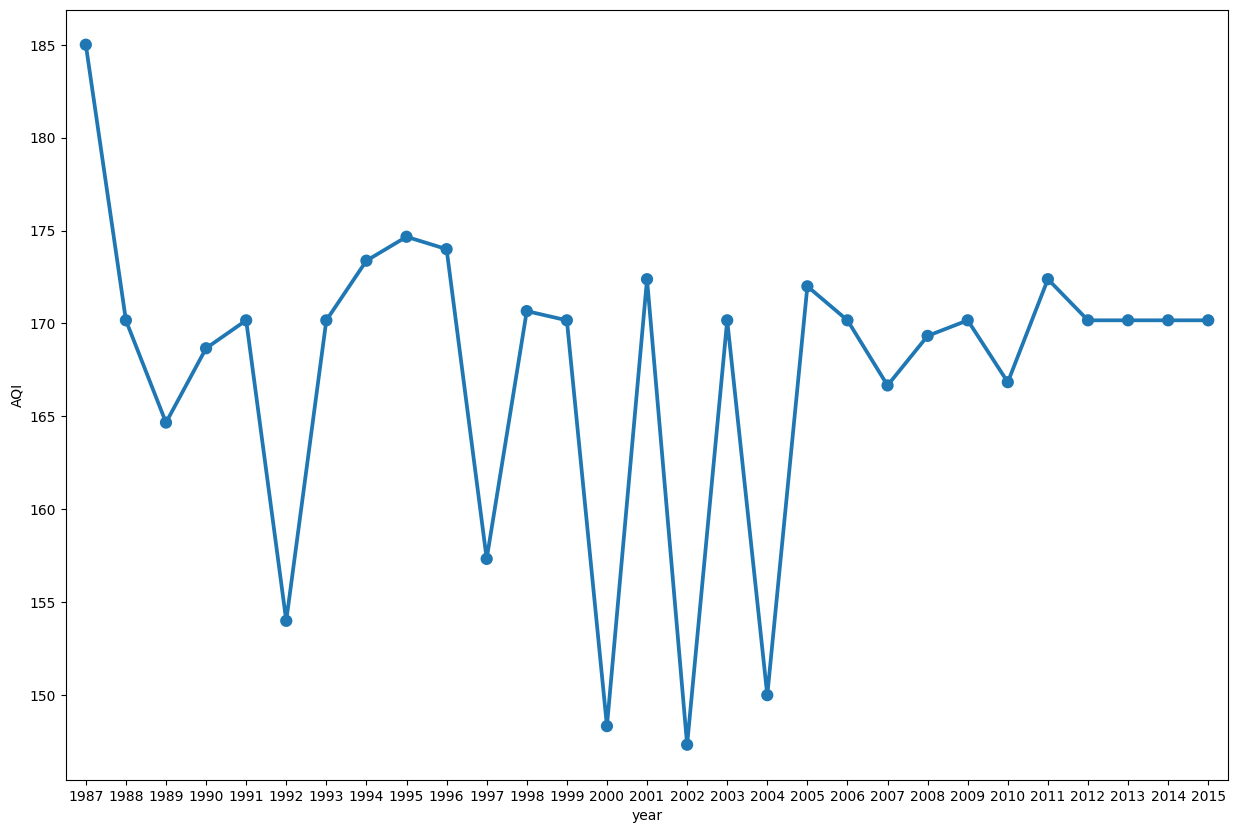

In [21]:
#Visualization of AQI across india

dataset['date'] = pd.to_datetime(dataset['date'],format='%Y-%m-%d') # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]

df = dataset[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [22]:
#Exploring air pollution state-wise
dataset.fillna(0.0,inplace=True)
states=dataset.groupby(['state','location'],as_index=False).mean()
state=states.groupby(['state'],as_index=False).mean()
state

,state,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,pmi,AQI,year
0,Andhra Pradesh,7.005150,17.705235,73.718197,197.085630,0.000000,8.740983,22.091476,84.591479,165.285154,0.000000,165.901863,2011.649547
1,Arunachal Pradesh,3.179104,5.469697,76.629213,0.000000,0.000000,3.973881,6.837121,84.939295,0.000000,0.000000,0.000000,2014.666667
2,Assam,6.297072,14.122107,79.860142,141.421396,0.000000,7.871341,17.652233,81.545275,126.050825,0.000000,126.577559,2011.302031
3,Bihar,33.321814,42.324845,123.705176,281.948937,0.000000,40.939075,52.833105,113.740949,233.301398,0.000000,234.617619,1997.542211
4,Chandigarh,2.676986,18.619404,96.587079,206.056150,0.000000,3.346232,23.271826,96.646110,174.128162,0.000000,174.262893,2009.221831
5,Chhattisgarh,11.964182,25.336867,127.909085,233.774753,0.000000,14.955227,31.670710,114.758968,192.639060,0.000000,192.897348,2010.187112
6,Dadra & Nagar Haveli,8.037770,15.451606,76.720537,149.020211,30.511628,10.047213,19.314507,91.353542,132.029920,30.511628,138.964052,2004.342285
7,Daman & Diu,7.339134,12.615693,73.749431,127.996169,27.886364,9.173918,15.769616,89.039467,114.877290,27.886364,124.524897,2000.611876
8,Delhi,8.737273,53.489147,196.639771,399.402088,95.113208,10.908845,65.928540,136.469616,332.640733,94.889452,332.829348,2006.803415
9,Goa,7.424731,11.790294,59.443098,57.524474,18.995716,9.254478,14.737801,69.158024,56.055605,18.984334,79.622941,2011.932261


<Axes: title={'center': 'States & Pollutant Levels'}, xlabel='state'>

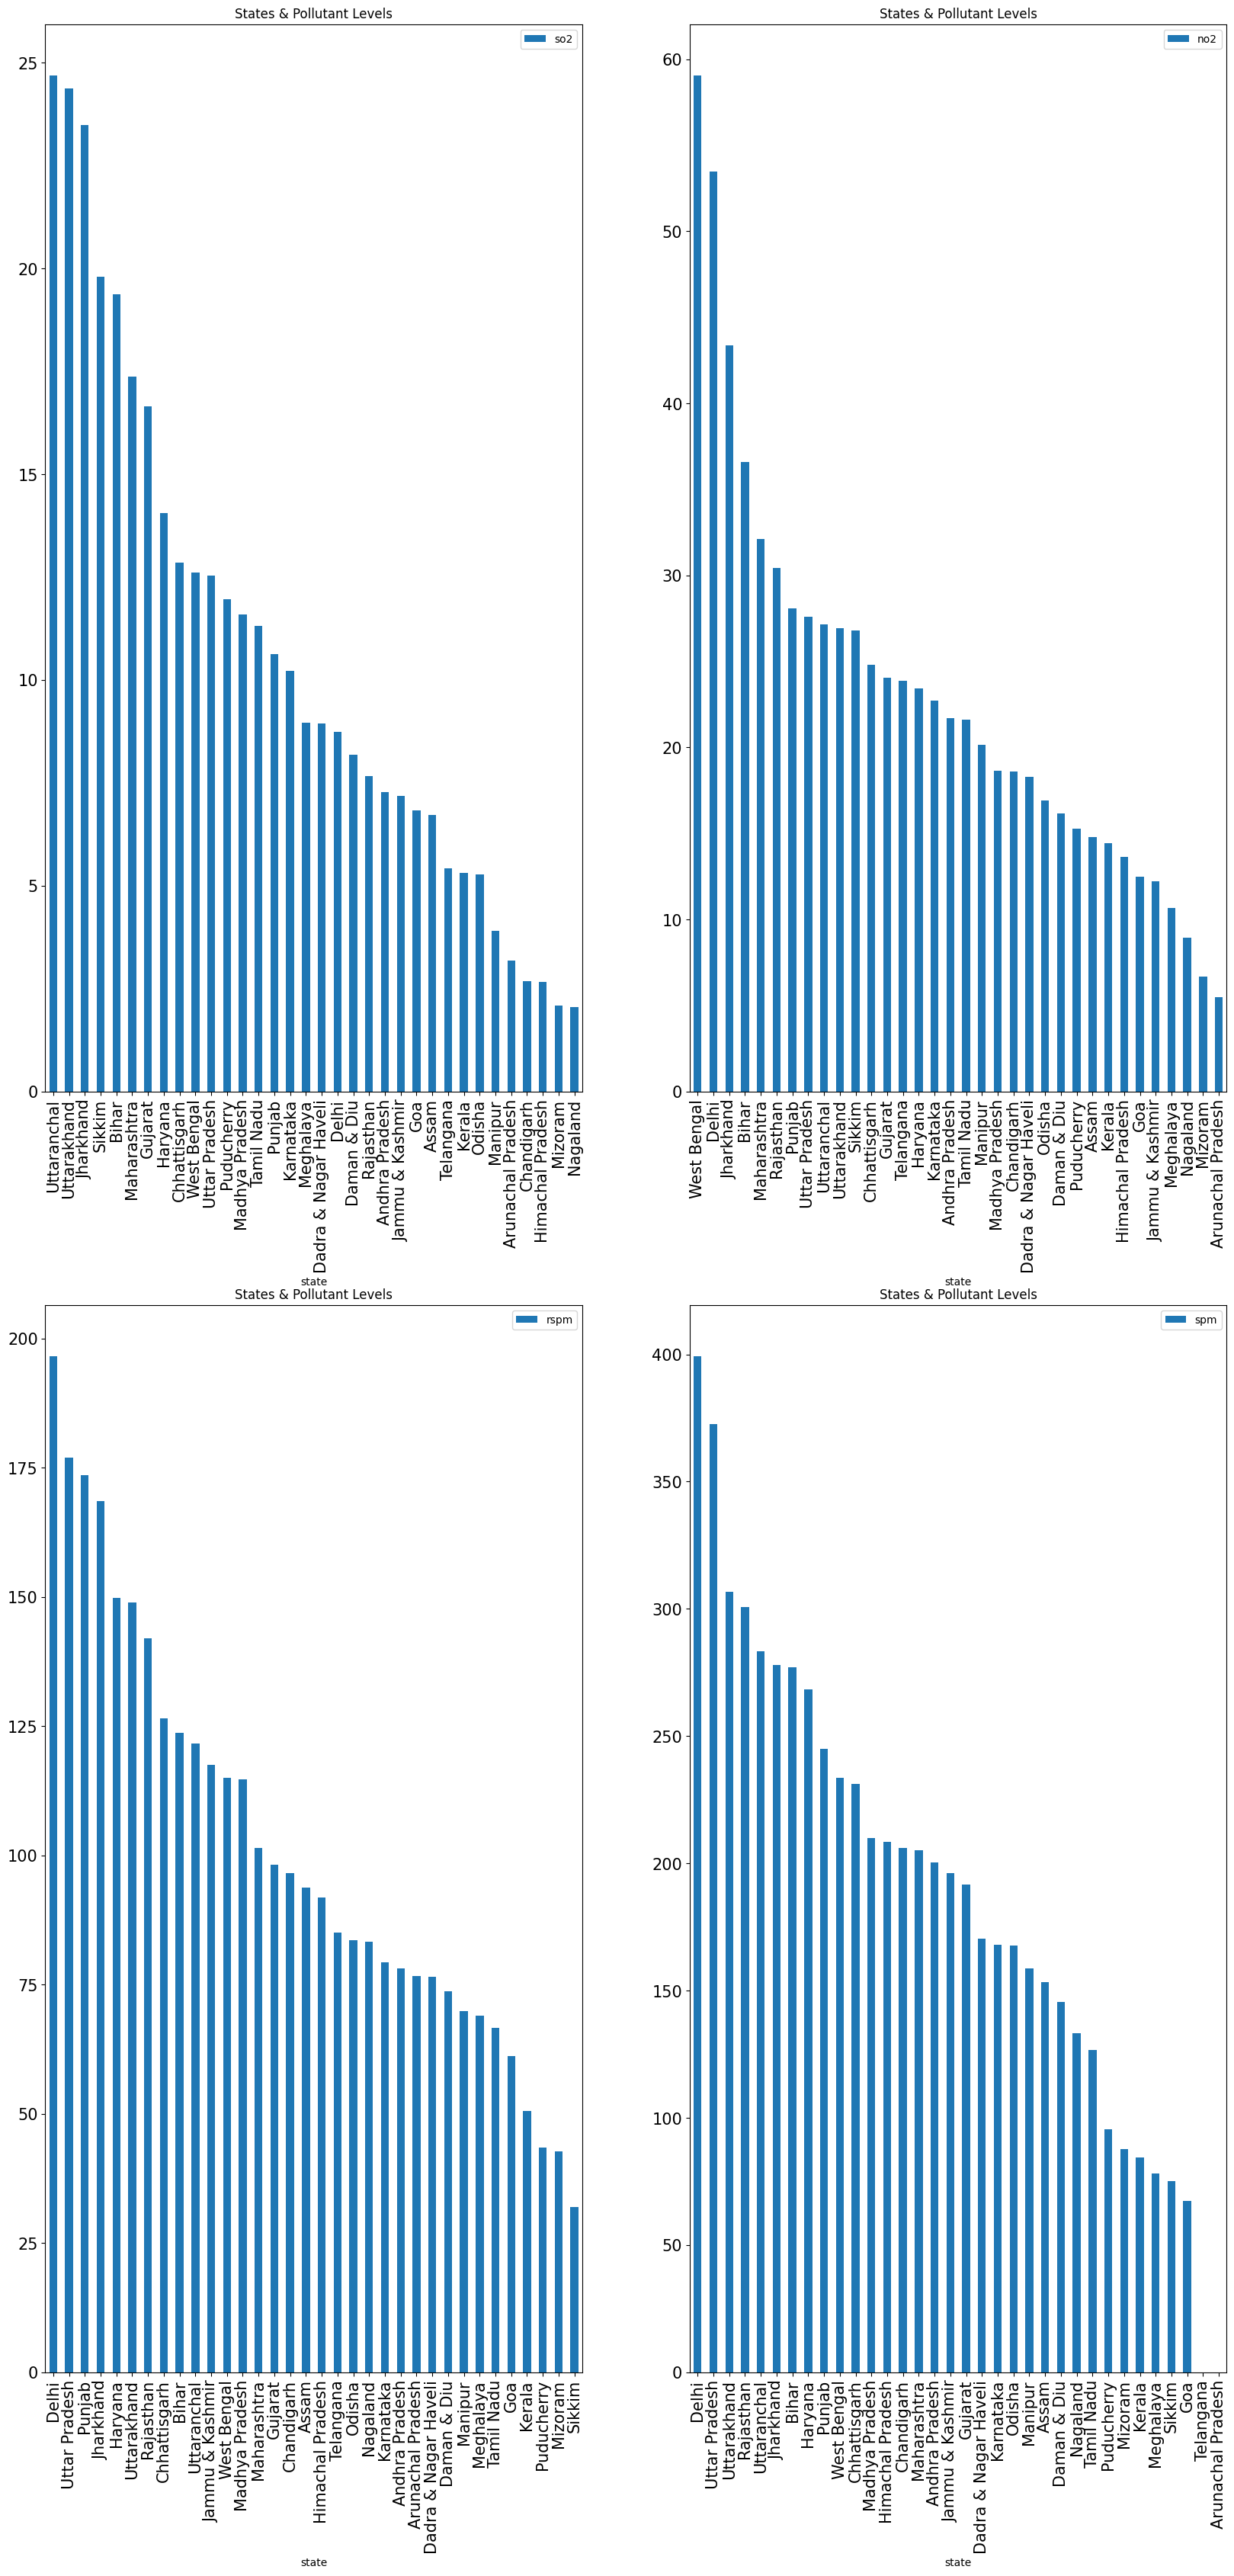

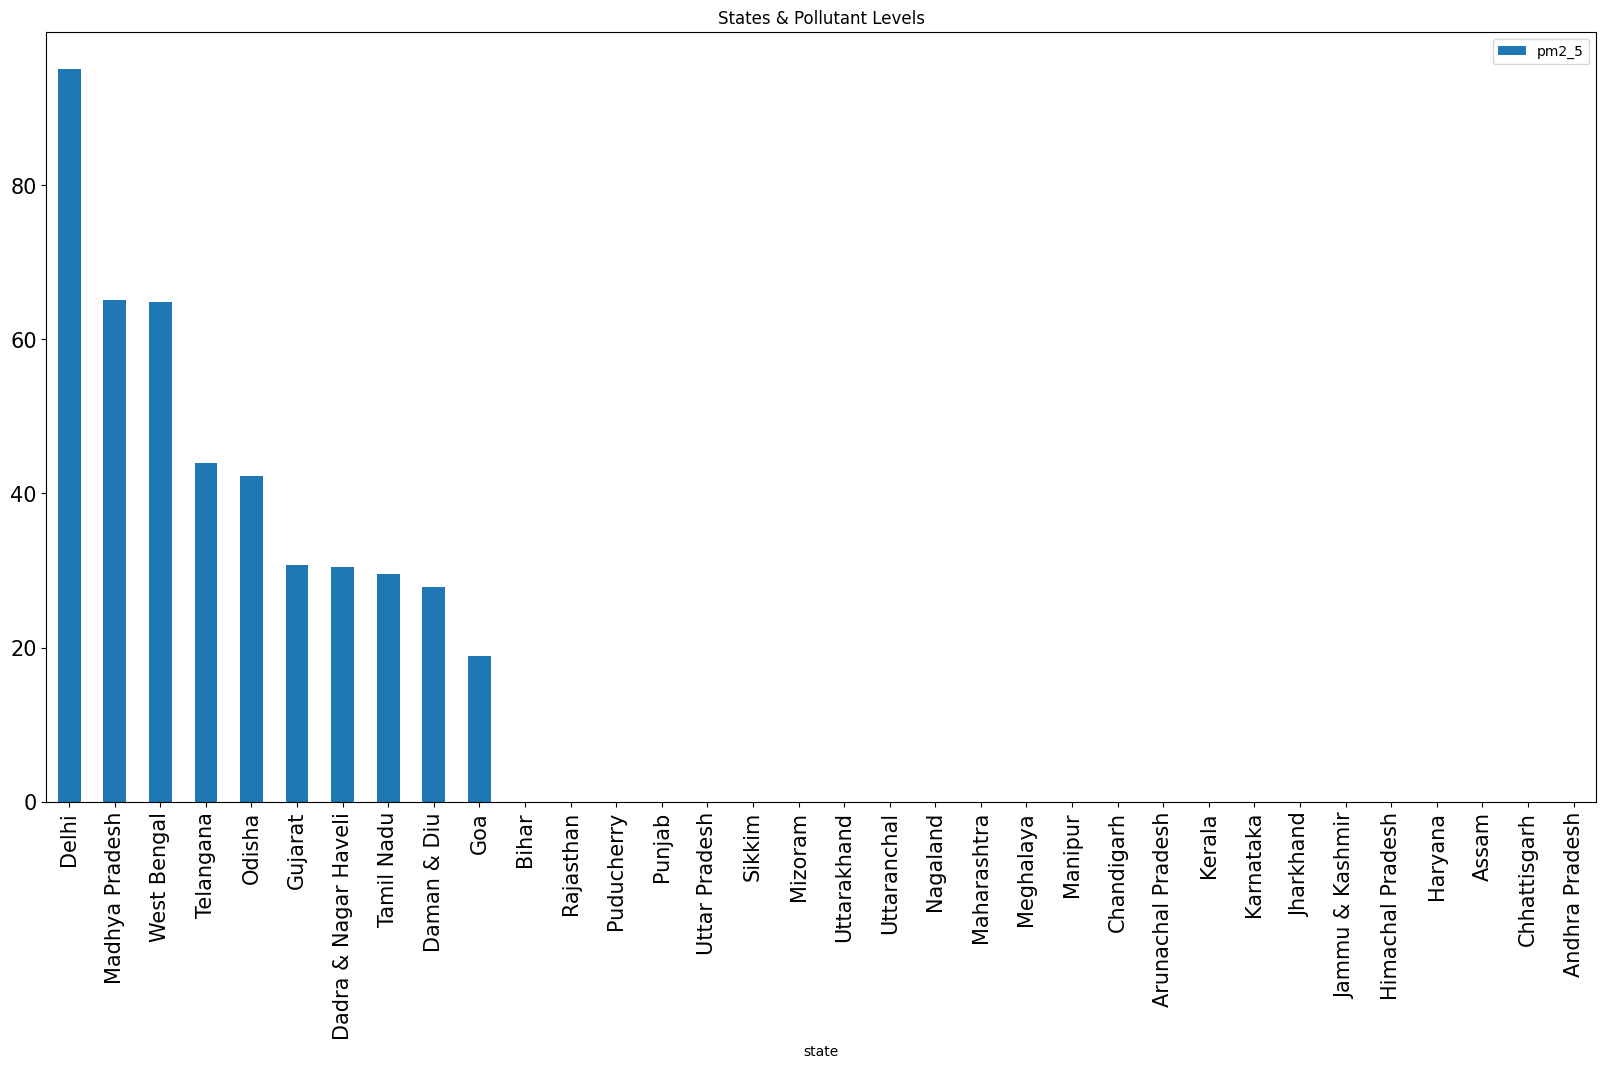

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,40))
state_pollution = dataset[['state','so2']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('so2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][0])

state_pollution_no2 = dataset[['state','no2']].groupby('state').mean()
state_pollution_no2.reset_index(inplace = True)
state_pollution_no2.sort_values('no2', ascending= False, inplace = True)
state_pollution_no2.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][1])

state_pollution_rspm = dataset[['state','rspm']].groupby('state').mean()
state_pollution_rspm.reset_index(inplace = True)
state_pollution_rspm.sort_values('rspm', ascending= False, inplace = True)
state_pollution_rspm.plot(kind = 'bar', figsize= (20,40), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][0])


state_pollution_spm = dataset[['state','spm']].groupby('state').mean()
state_pollution_spm.reset_index(inplace = True)
state_pollution_spm.sort_values('spm', ascending= False, inplace = True)
state_pollution_spm.plot(kind = 'bar', figsize= (20,40), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][1])


state_pollution = dataset[['state','pm2_5']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('pm2_5', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels')

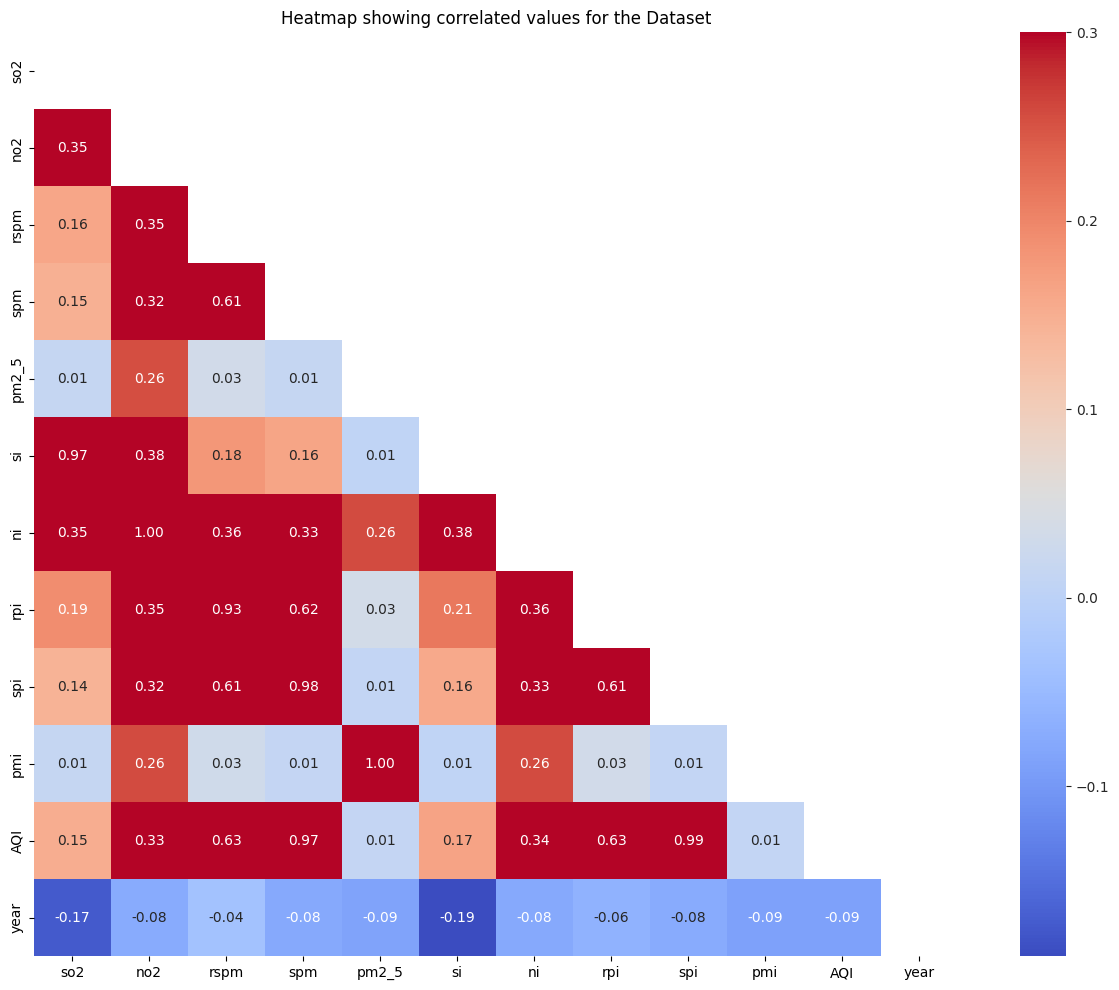

In [24]:
#correlation
dataset.corr()
plt.figure(figsize=(16,12))
ax=plt.axes()
#sns.heatmap(data=fifa_dataset.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
mask = np.zeros_like(dataset.iloc[:,:].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data=dataset.iloc[:,:].corr(), mask=mask, vmax=.3, annot=True,fmt='.2f', square=True, cmap='coolwarm')

ax.set_title('Heatmap showing correlated values for the Dataset')
plt.show()

<Axes: title={'center': 'AQI by state and year'}, xlabel='year', ylabel='state'>

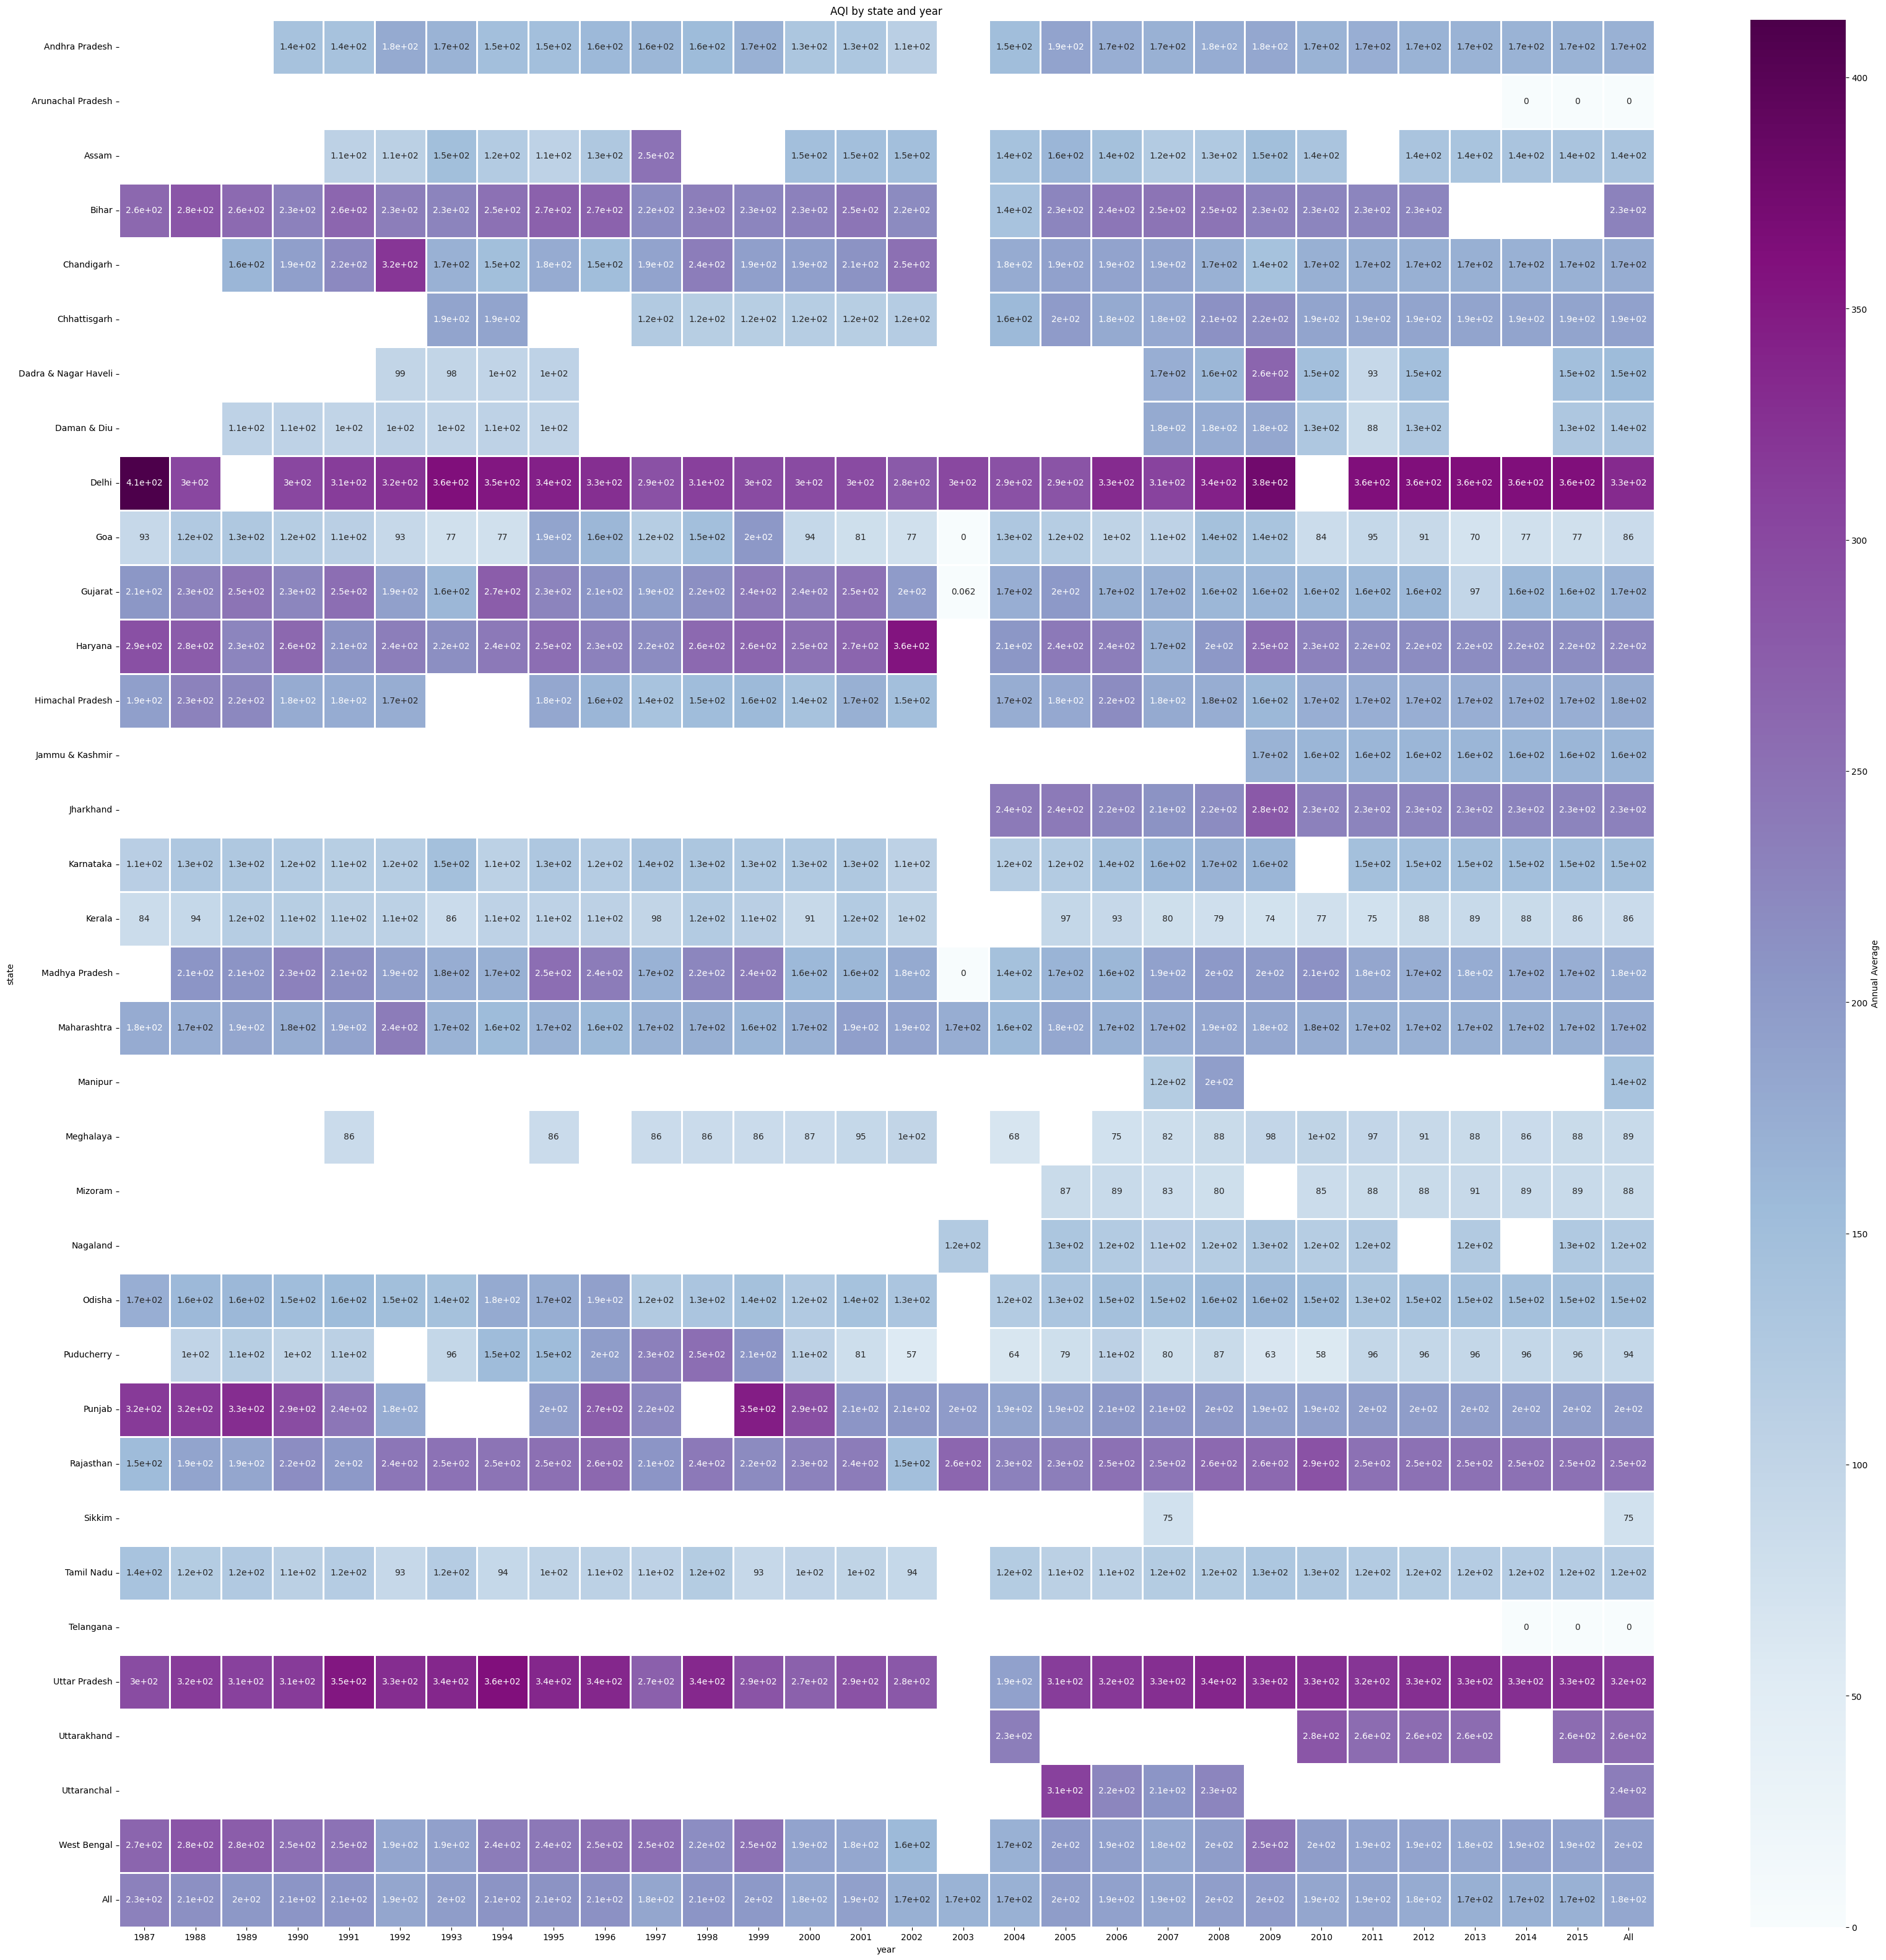

In [25]:
#Heatmap Pivot with State as Row, Year as Col, AQI as Value
dataset['date'] = pd.to_datetime(dataset['date'],format='%Y-%m-%d') # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]
f, ax = plt.subplots(figsize=(40,40))
ax.set_title('{} by state and year'.format('AQI'))
sns.heatmap(dataset.pivot_table('AQI', index='state',
                columns=['year'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=.75, ax=ax,cbar_kws={'label': 'Annual Average'})

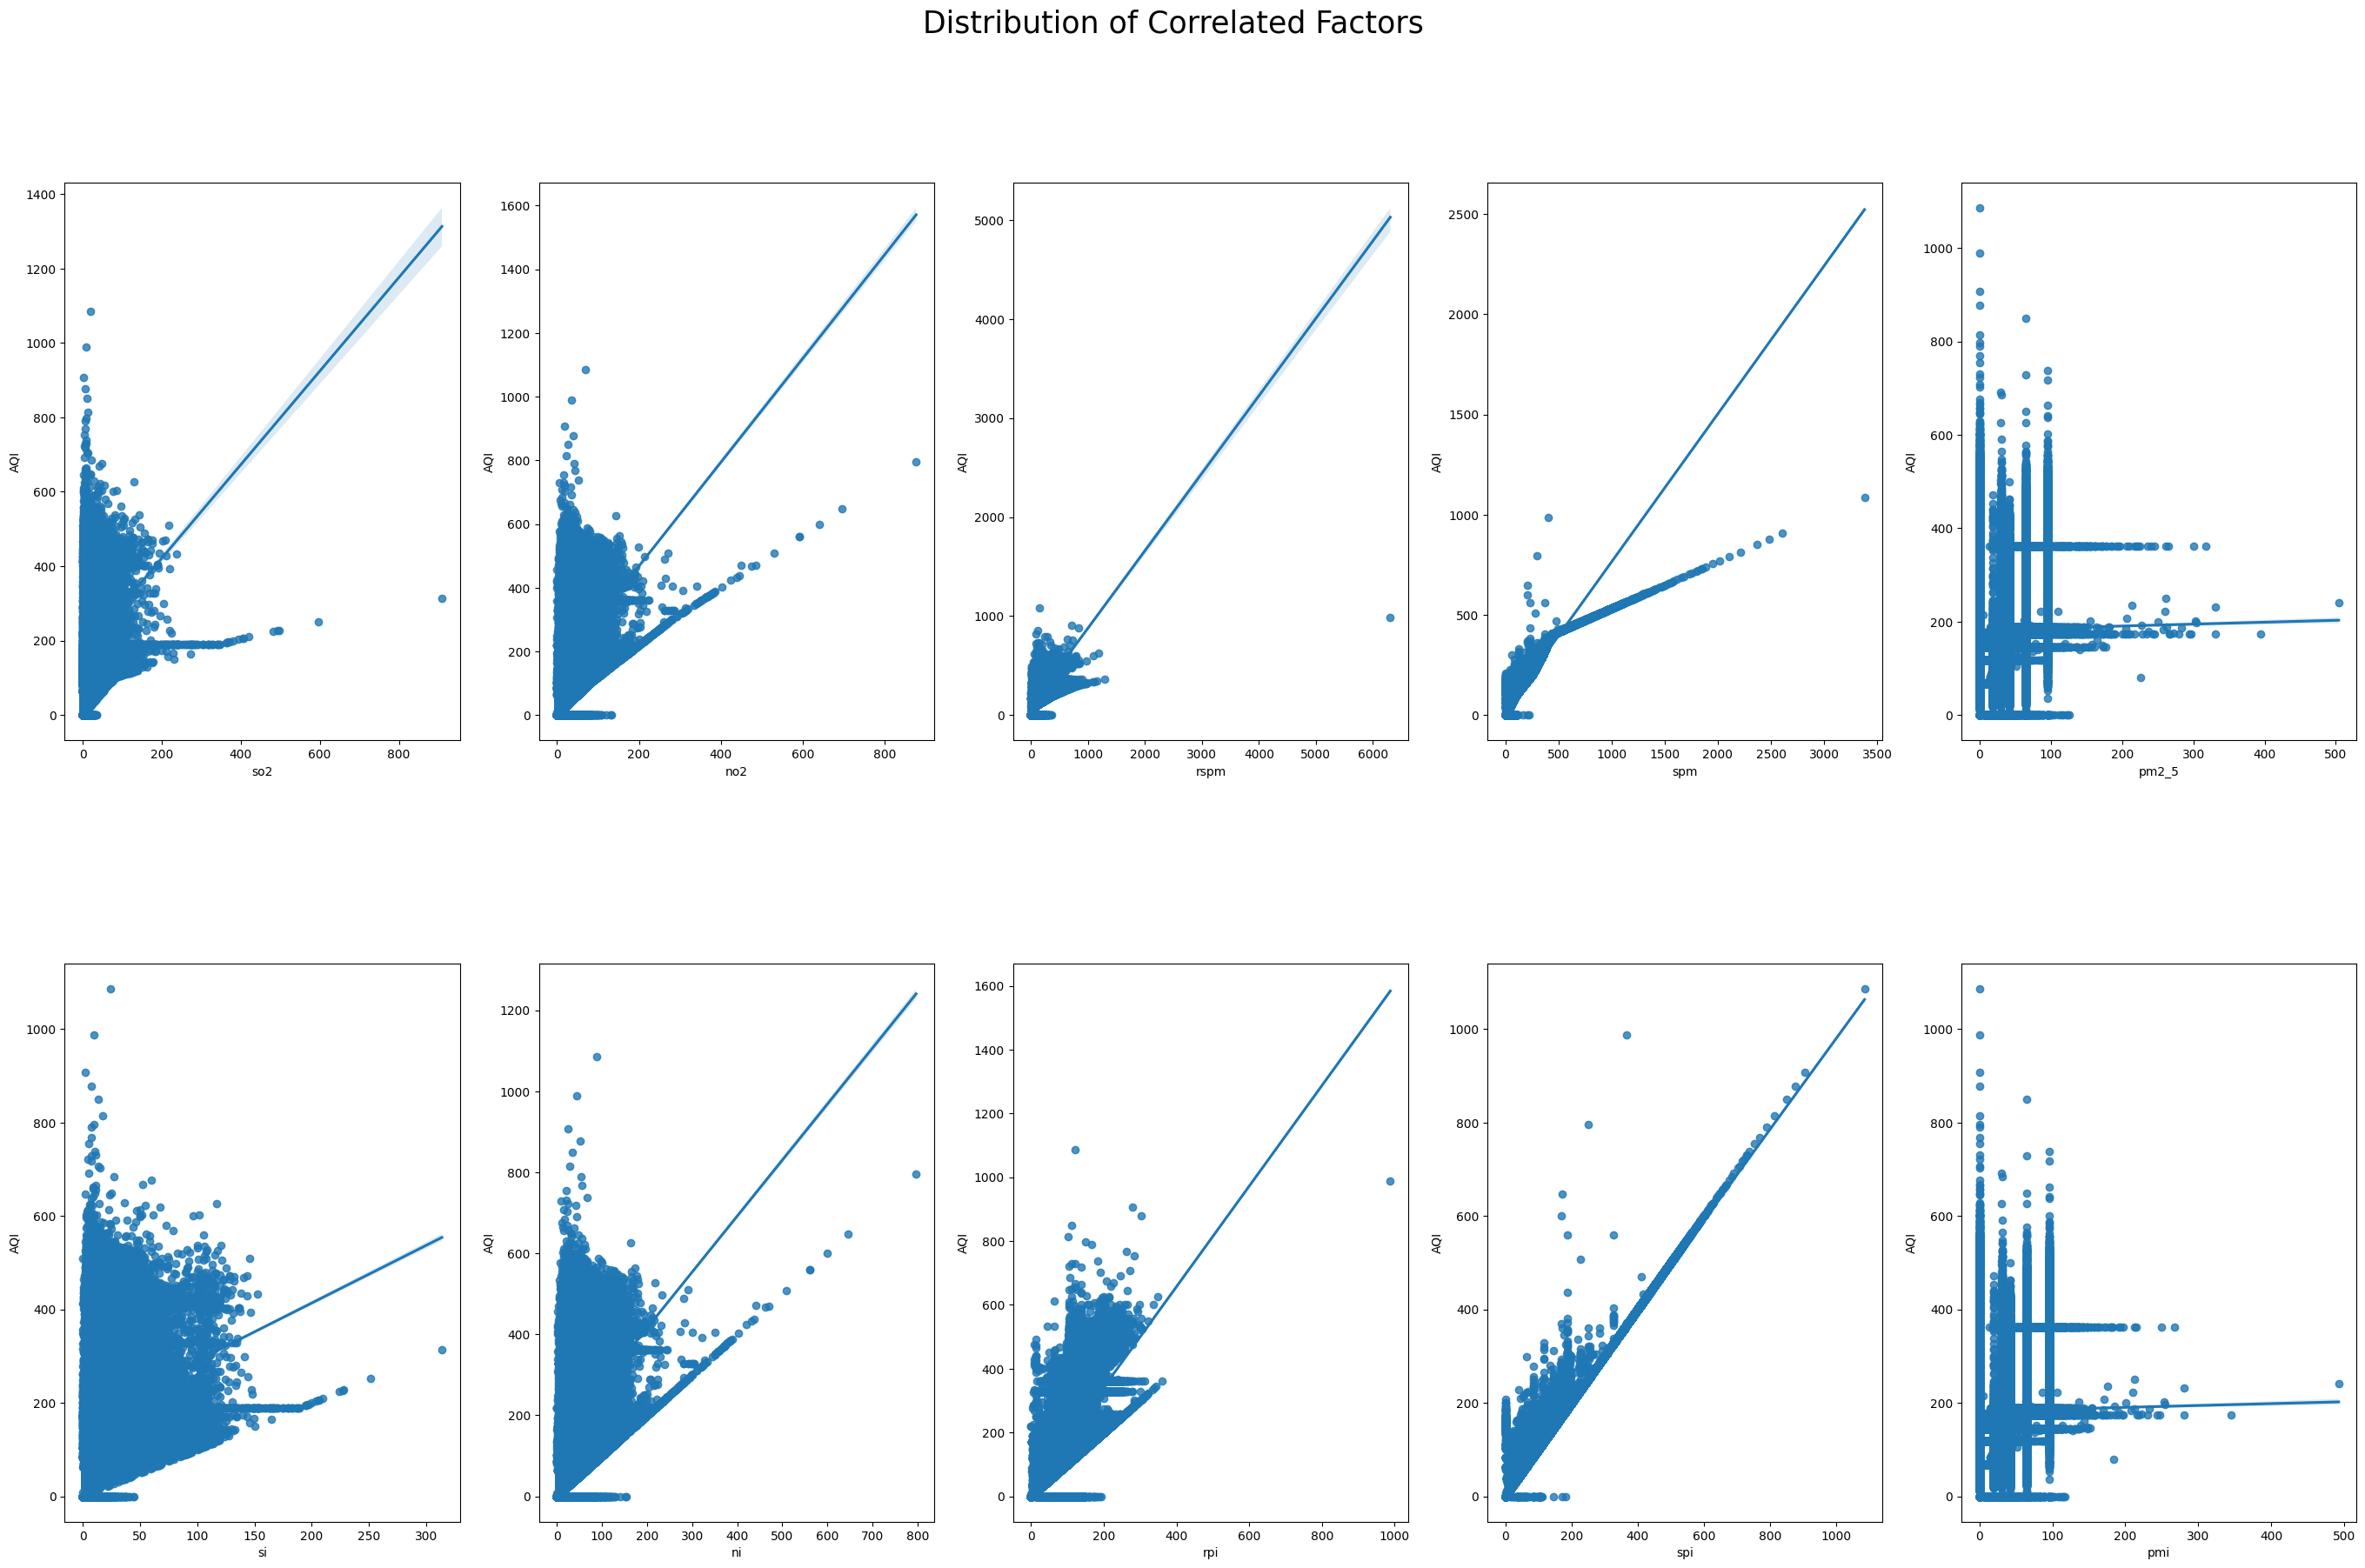

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in dataset.columns.values[3:15]:
    if ((col!='AQI')&(col!='state')&(col!='location')&(col!='type')&(col!='date')&(col!='year')&(col!='state_label')&(col!='type_label')):

        colums=np.array(dataset[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(5):

        #x=z.index.values[i*3+j]
        #sns.barplot(z.index[i*3+j],z.values[i*3+j])
        #x=z.index.values[i*3+j]

        y_label=z.index[i*5+j]
        x_label=z[i*5+j]

        sns.regplot(data=dataset, x=z.index[i*5+j], y='AQI',ax=axes[i,j])


fig.suptitle('Distribution of Correlated Factors', fontsize='25')
plt.show()

In [27]:
dataset['state_label'] = dataset['state'].astype('category')
cat_columns = dataset.select_dtypes(['category']).columns
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)

In [28]:
dataset["type_label"]=dataset["type"].astype(str)
dataset["type_label"] = np.where(dataset["type"].str.contains('Residential, Rural and other Areas'), 1, 0)


In [29]:
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,pmi,AQI,year,state_label,type_label
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0.0,1990-02-01,6.000,21.750,97.72853,166.840252,0.0,166.840252,1990,0,1
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,0.0,1990-02-01,3.875,8.750,97.72853,166.840252,0.0,166.840252,1990,0,0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0.0,1990-02-01,7.750,35.625,97.72853,166.840252,0.0,166.840252,1990,0,1
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0.0,1990-03-01,7.875,18.375,97.72853,166.840252,0.0,166.840252,1990,0,1
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,0.0,1990-03-01,5.875,9.375,97.72853,166.840252,0.0,166.840252,1990,0,0
